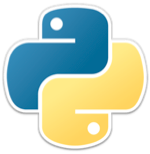


# Python Coding Club

This series is to introduce Python as a programming language to be used for data analysis, scientific computing and plotting. It is by __no means comprehensive__ but will provide a basis for further investigation and exploration into this powerful language. These notes are __best visualised__ in a __Jupyter Notebook__ and I encourage you to __follow along__ in your __preferred IDE__.

# Part 7: Classes

Part 5 of this series will focus on another useful concept, **classes**. Whilst classes are very useful they might not seem useful at first glance, however, as your program/analysis becomes more complex, your program may benefit from encapsulating similar sets of functions as a class.

In any case, understanding classes will be highly useful when utilising imported external libraries/modules to understand their documentation.

## Exercise Solutions

## Exercise 7.1: Unit conversion

One thing that arrays are very useful for, is that they can convert units without the need for `for` or `while` loops over each element of the array. 

In this exercise, you will convert the following wavelength data into electron volts using a numpy array. 

Secondly, find what electron volts have an intensity above 10,000 by using boolean indexing.

The conversion equation is shown below:
$$
\frac{hc}{e\lambda} = \frac{J}{e} = eV
$$

Where $h$ is Planck's constant, $c$ is the speed of light in a vacuum, $J$ is the energy in Joules, $e$ is the elementary charge on an electron, $\lambda$ is the wavelength and $eV$ is electron volts.

Run the cell below to set up the data and for a quick visualisation.

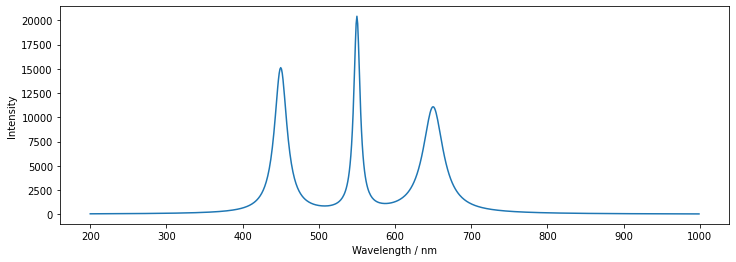

In [4]:
# For visualisation.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

def lorentzianModel(mu, gamma, height):    # To help produce intensities.
    def evaluate(x):
        return height/(((x-mu)/gamma)**2 +1)
    return evaluate

peaks = [[450, 10, 15000], [550, 5, 20000], [650, 16, 11000]]   # Three sets of parameters.
peak_model = [lorentzianModel(*peak) for peak in peaks]         # Make three peaks

wavelength = list(range(200,1000))                               # Purely python list setting up.
intensity = [sum(peak(x) for peak in peak_model) for x in wavelength]  # producing intensities.
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
ax1.plot(wavelength, intensity)
ax1.set_xlabel('Wavelength / nm')
ax1.set_ylabel('Intensity')
plt.show()

Fill in the below code to produce the array of electron volt values by the conversion above, without using for loops.

In [5]:
# -----------------------------------------------------------------------------------------------------
# For this section, turn the wavelength and intensity into arrays, perhaps define some useful variables.
wavelength = np.array(wavelength)
intensity = np.array(intensity)


h = 6.62607004e-34 # J s
c = 299792458  # m s-1
e = 1.60217662e-19 # C

def wave_2_ev(wave):
    return h*c/(e*(wave*1e-9))

def ev_2_wave(ev):
    return (h*c/(e*ev))*1e9

# -----------------------------------------------------------------------------------------------------

# Produce arrays for electron volts by using the conversion.
electron_volts = wave_2_ev(wavelength)
print(f"Subset of eVs:")
print(electron_volts[::25])
print(f"\nSubset of wavelengths:")
print(wavelength[::25])

Subset of eVs:
[6.19920987 5.51040878 4.9593679  4.50851627 4.13280658 3.81489838
 3.54240564 3.30624527 3.09960494 2.91727523 2.75520439 2.61019363
 2.47968395 2.36160376 2.25425814 2.15624691 2.06640329 1.98374716
 1.90744919 1.83680293 1.77120282 1.71012686 1.65312263 1.5997961
 1.54980247 1.50283876 1.45863762 1.41696226 1.37760219 1.3403697
 1.30509682 1.27163279]

Subset of wavelengths:
[200 225 250 275 300 325 350 375 400 425 450 475 500 525 550 575 600 625
 650 675 700 725 750 775 800 825 850 875 900 925 950 975]


**Explanation**: In this part first we convert the lists into `np.ndarray`s by simply using the array constructor. Then we define Planck's constant as `h`, the speed of light in a vacuum as `c` and the elemental charge as `e`. 

Next I decided to create two functions, one that would convert a wavelength to an electron volt (`wave_2_ev`) and another that does the inverse (`ev_2_wave`). Then, passing the `wavelength` array to the function causes the function to act on each element of the array, returning a new array with the electron volts. Of course this could have been done without writing the functions, but now I can convert between the two easily by simply passing the array to the appropriate function. 

Now find the electron volts and wavelengths with an intensity over 10000 by boolean indexing.

In [6]:
# Create a boolean array of intensities greater than 10000.
intensity_over_10000 = intensity > 10000

# -----------------------------------------------------------------------------------------------------

# Print the electron volts and wavelengths that have an intensity over 10000.
print(f'eVs where intensity is > 10000:\n{electron_volts[intensity_over_10000]}\n')
print(f'Wavelengths where intensity is > 10000:\n{wavelength[intensity_over_10000]}')
# -----------------------------------------------------------------------------------------------------

eVs where intensity is > 10000:
[2.79874035 2.79243688 2.78616174 2.77991474 2.77369569 2.76750441
 2.7613407  2.75520439 2.74909529 2.74301322 2.736958   2.73092946
 2.72492742 2.7189517  2.71300213 2.2749394  2.27077285 2.26662153
 2.26248536 2.25836425 2.25425814 2.25016692 2.24609053 2.24202889
 2.2379819  2.2339495  1.92223562 1.91926002 1.91629362 1.91333638
 1.91038825 1.90744919 1.90451916 1.90159812 1.89868603 1.89578284
 1.89288851]

Wavelengths where intensity is > 10000:
[443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 545 546 547
 548 549 550 551 552 553 554 555 645 646 647 648 649 650 651 652 653 654
 655]


**Explanation**: This part simply involved creating a boolean array by writing `intensity > 10000`. This compares each element in the `intensity` array to `10000` and returns an array of `True` and `False` depending on the value. This boolean array is then used as an index on the `electron_volts` and `wavelength` arrays, where only the `True` indicies are shown. 

Next use `np.argmax()` and boolean slicing to find the electron volts associated with each peak.

To do this, use a list comprehension or for loop to loop over the wavelengths `450`, `550` and `650`. Create a boolean index of wavelengths that fall beside 75 of each side of each wavelength.
Then create another another list comprehension, which selects the electron volts from each region that have the highest intensity, by using `np.argmax()` on the intensity values of each region.

Set `peak_evs` to be a list/array containing the electron volts for the maximum values in each given region.
Set `peak_intens` to be the maximum intensity for each region.

In [8]:
# -------------------------------------------------------------------------------------------
between = np.array([(wavelength < wv+50) & (wavelength > wv-50) for wv in [450, 550, 650]])
peak_evs = np.array([electron_volts[region][np.argmax(intensity[region])] for region in between])
peak_intens = np.array([np.max(intensity[region]) for region in between])
print(f'eV for highest intensity between 400-500 nm:\t {peak_evs[0]:.2f} eV')
print(f'eV for highest intensity between 500-600 nm:\t {peak_evs[1]:.2f} eV')
print(f'eV for highest intensity between 600-700 nm:\t {peak_evs[2]:.2f} eV')
# -------------------------------------------------------------------------------------------

eV for highest intensity between 400-500 nm:	 2.76 eV
eV for highest intensity between 500-600 nm:	 2.25 eV
eV for highest intensity between 600-700 nm:	 1.91 eV


**Explanation**: This part was a bit more tricky. Essentially the first line creates a list comprehension that is an array of three boolean arrays. Each boolean array contains `True` if the `wavelength` value lies between `wv-50 < value < wv+50` creating a small region. There is a boolean array for `wv = [450, 550, 650]` hence producing three boolean arrays for the different conditions. 

The second line for `peak_evs` is a list comprehension that takes each boolean array `region` in `between` and finds the electron volts in that region, then indexes that array with the index that corresponds to the maximum value of the intensity array in that region, therefore producing three eV values, one for the maximum intensity in each region. 

The third line for `peak_intens` is much simpler, simply finding the maximum intensity for each region, and saving it as a list. 

As a sanity check, the peak electron volts can be converted into wavelengths, and since the data peaks are set up at `450`, `550` and `650`, the electron volts found should convert back to those wavelengths, lets check with the `ev_2_wave` function. 

In [10]:
peak_wv = ev_2_wave(peak_evs)
print(f'wavelength for highest intensity between 400-500 nm:\t {peak_wv[0]:.2f} nm')
print(f'wavelength for highest intensity between 500-600 nm:\t {peak_wv[1]:.2f} nm')
print(f'wavelength for highest intensity between 600-700 nm:\t {peak_wv[2]:.2f} nm')

wavelength for highest intensity between 400-500 nm:	 450.00 nm
wavelength for highest intensity between 500-600 nm:	 550.00 nm
wavelength for highest intensity between 600-700 nm:	 650.00 nm


Plotting for visualisation.

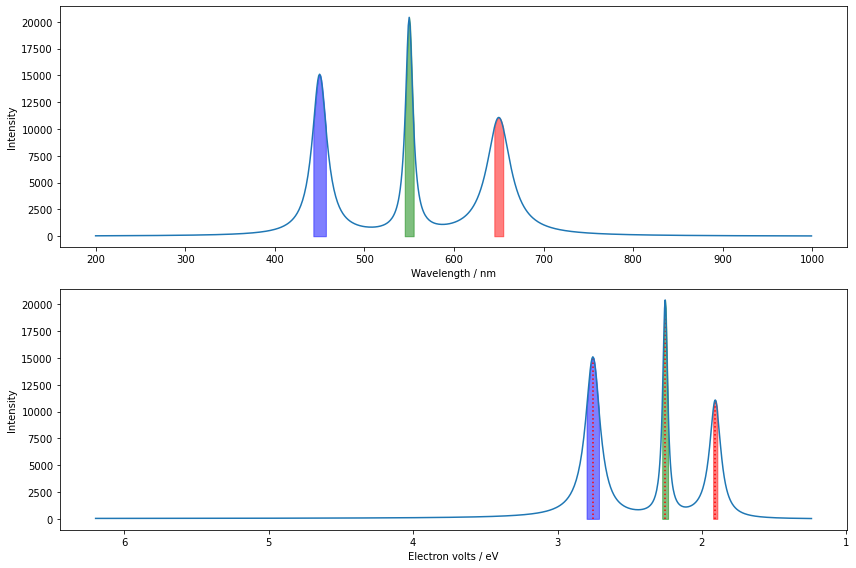

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(wavelength, intensity)
ax2.plot(electron_volts[::-1], intensity[::-1])
ax1.set_xlabel('Wavelength / nm')
ax2.set_xlabel('Electron volts / eV')
ax1.set_ylabel('Intensity')
ax2.set_ylabel('Intensity')

# Filling the areas that are higher than 
colors = ['b', 'g', 'r']
for i, wvlngth in enumerate([450, 550, 650]):
    ax1.fill_between(wavelength[(intensity_over_10000) & (wavelength < wvlngth+75) & (wavelength > wvlngth-75)], y1=0, 
                 y2=intensity[(intensity_over_10000) & (wavelength < wvlngth+75) & (wavelength > wvlngth-75)], 
                     color=colors[i], alpha=0.5)
for i, ev in enumerate([wave_2_ev(450), wave_2_ev(550), wave_2_ev(650)]):
    ax2.fill_between(electron_volts[(intensity_over_10000) & (electron_volts < ev+0.05) & (electron_volts > ev-0.05)], 
                     y1=0, y2=intensity[(intensity_over_10000) & (electron_volts < ev+0.05) & (electron_volts > ev-0.05)], 
                     color=colors[i], alpha=0.5)
ax2.vlines(peak_evs, ymin=0, ymax=peak_intens, color='r', ls=':')
ax2.invert_xaxis()
plt.tight_layout()

This exercise shows the use of using numpy for numerical analysis by indexing using boolean arrays and for efficient manipulations/conversions of data.